In [1]:
import pandas as pd

In [2]:
true_news_data = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')

In [3]:
true_news_data['IS_FAKE'] = 0 # Creating default column

In [4]:
true_news_data.head()

,title,text,subject,date,IS_FAKE
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [5]:
fake_news_data = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')

In [6]:
fake_news_data['IS_FAKE'] = 1 # Creating default column

In [7]:
fake_news_data.head()

,title,text,subject,date,IS_FAKE
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [8]:
news_data = pd.concat([true_news_data,fake_news_data]) # Concating the dataframes

In [9]:
news_data = news_data.sample(frac=1.0).reset_index(drop=True) # Shuffling the data

news_data.head()

,title,text,subject,date,IS_FAKE
0,"A Dallas Cop Just Filed Suit Against Obama, H...","A Dallas police officer, seeing red after seve...",News,"September 18, 2016",1
1,Changes to North Carolina voting laws could pu...,"RALEIGH, North Carolina (Reuters) - On Electio...",politicsNews,"July 15, 2016",0
2,CNN Accidentally Airs Raunchy Screen Capture ...,With the presidential race narrowing down to D...,News,"May 26, 2016",1
3,Representative Scalise's condition upgraded to...,WASHINGTON (Reuters) - U.S. Representative Ste...,politicsNews,"June 17, 2017",0
4,East Timor President says to swear in Mari Alk...,DILI (Reuters) - East Timor is set to swear in...,worldnews,"September 14, 2017",0


In [10]:
news_data.IS_FAKE.value_counts() # proprtion of data

1    23481
0    21417
Name: IS_FAKE, dtype: int64

In [11]:
news_data.subject.groupby(news_data['IS_FAKE']).value_counts()

IS_FAKE  subject        
0        politicsNews       11272
         worldnews          10145
1        News                9050
         politics            6841
         left-news           4459
         Government News     1570
         US_News              783
         Middle-east          778
Name: subject, dtype: int64

<img src='https://drive.google.com/uc?export=view&id=1QxVs7yMvhNw5spf1SM5SpZ-crrD3JojG' height=350 >

We will be using TextHero library, it has pre-coded function to clean, transform and visualise our data.

Checkout this library [here](https://texthero.org/).

In [13]:
import texthero as hero # Importing TextHero

/opt/conda/lib/python3.7/site-packages/spacy/util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [14]:
fake_news_data.loc[0,'text']

# From below data we can confirm that our data is uncleaned as it has numbers, bracket, special characters.
# Thus, this data cannot be directly provided to ML model

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

# Data Pre-Processing
We will use texthero builtin functions to clean our data as below,

## 1. FILL NULL VALUES

In [15]:
news_data.isnull().sum()

# Since, our data has no null values we can skip this step

title      0
text       0
subject    0
date       0
IS_FAKE    0
dtype: int64

## 2. CONVERT TO LOWER CASE

In [16]:
news_data['text'] = hero.lowercase(news_data['text'])

# Converting text column to lower case

In [17]:
news_data.head()

,title,text,subject,date,IS_FAKE
0,"A Dallas Cop Just Filed Suit Against Obama, H...","a dallas police officer, seeing red after seve...",News,"September 18, 2016",1
1,Changes to North Carolina voting laws could pu...,"raleigh, north carolina (reuters) - on electio...",politicsNews,"July 15, 2016",0
2,CNN Accidentally Airs Raunchy Screen Capture ...,with the presidential race narrowing down to d...,News,"May 26, 2016",1
3,Representative Scalise's condition upgraded to...,washington (reuters) - u.s. representative ste...,politicsNews,"June 17, 2017",0
4,East Timor President says to swear in Mari Alk...,dili (reuters) - east timor is set to swear in...,worldnews,"September 14, 2017",0


## 3. REMOVE NON-ALPHA TEXT(DIGITS,PUNCTUATIONS,DIACRITICS)

In [18]:
news_data['text'] = hero.remove_digits(news_data['text']) # To remove digits

In [19]:
news_data['text'] = hero.remove_punctuation(news_data['text']) # To remove punctuations

In [20]:
news_data['text'] = hero.remove_diacritics(news_data['text']) # To remove diacritics

In [21]:
# To remove any form of brackets

news_data['text'] = hero.remove_brackets(news_data['text'])
news_data['text'] = hero.remove_angle_brackets(news_data['text'])
news_data['text'] = hero.remove_curly_brackets(news_data['text'])
news_data['text'] = hero.remove_round_brackets(news_data['text'])
news_data['text'] = hero.remove_square_brackets(news_data['text'])

## 4. REMOVE STOP WORDS

In [22]:
hero.top_words(news_data['text'])[:10]

# From below data we can see that there are many unwanted words, we will remove these words

the     1026052
to       536553
of       441919
a        413373
and      409052
in       352814
that     238734
s        227697
on       192186
for      173375
Name: text, dtype: int64

In [23]:
news_data['text'] = hero.remove_stopwords(news_data['text'])

In [24]:
hero.top_words(news_data['text'])[:10] # Stop words have been removed, but there still seems to have unwanted characters

trump        134052
said         132825
"             68650
president     55893
would         55167
u             54292
people        41857
one           37927
state         34488
also          31357
Name: text, dtype: int64

In [25]:
news_data['text'] = hero.remove_punctuation(news_data['text'])

## 5. REMOVE WHITE SPACES

In [26]:
news_data['text'] = hero.remove_whitespace(news_data['text'])

## 6. REMOVE UNWANTED DATA

In [27]:
news_data['text'] = news_data['text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2 and word.isalpha() and word != 'reuters']))

# In above step we are only considering words that has more than 2 length and contains only alphabets

## 7. LEMMATIZATION

In [28]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
news_data['text'] = news_data['text'].apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(word) for word in x.split()]))

### Visualizing top words from Fake news

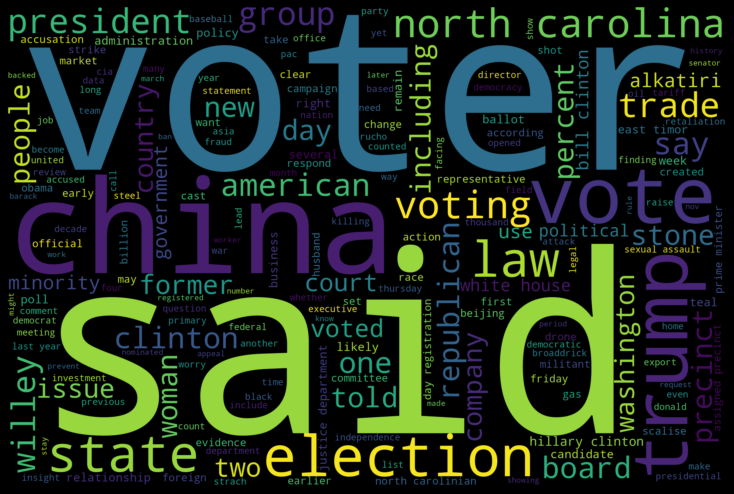

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(news_data.loc[news_data.IS_FAKE == 0,"text"].values))
    
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Visualizing top words from True news

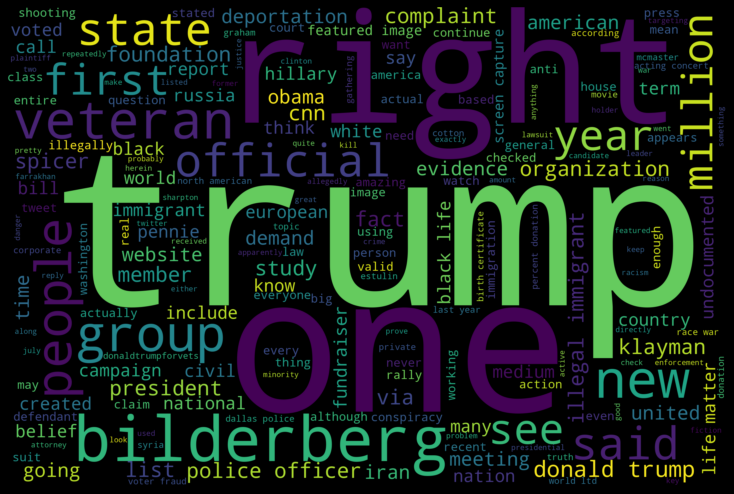

In [31]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(news_data.loc[news_data.IS_FAKE == 1,"text"].values))
    
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 8. TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
Tfidf_vect = TfidfVectorizer()
Train_content_tfidf = Tfidf_vect.fit_transform(news_data['text'])

# ML Model

In [34]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold,cross_val_score

In [35]:
SKF = StratifiedKFold(n_splits=5, shuffle=True)

In [36]:
print(f' Accuracy of Logistic Regression  : {round(cross_val_score(LogisticRegression(),Train_content_tfidf,news_data["IS_FAKE"],cv=SKF,scoring="accuracy").mean()*100,2)}%')

 Accuracy of Logistic Regression  : 97.91%


In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(Train_content_tfidf,news_data['IS_FAKE'],test_size=0.2)

In [38]:
LR = LogisticRegression()
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_test)

In [39]:
from sklearn import metrics

print(f' Accuracy Score : {round(metrics.accuracy_score(Y_test,Y_pred)*100,2)}%')
print(metrics.classification_report(Y_test,Y_pred))

 Accuracy Score : 98.03%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4271
           1       0.98      0.98      0.98      4709

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



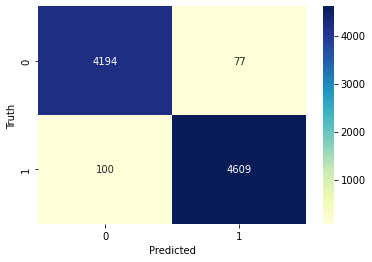

In [40]:
import seaborn as sns

sns.heatmap(metrics.confusion_matrix(Y_test,Y_pred), annot=True, fmt='d',cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# LSTM Model

In [41]:
import tensorflow as tf
from tensorflow import keras

## Tokenizing

In [42]:
MAX_NB_WORDS = 10000

tokenizer = keras.preprocessing.text.Tokenizer(MAX_NB_WORDS) # Selecting top 10000 words
tokenizer.fit_on_texts(news_data['text'])
train_data = tokenizer.texts_to_sequences(news_data['text'])

word_index = tokenizer.word_index

In [43]:
print(train_data[:2]) # Data is tokenized

[[2355, 57, 226, 1692, 1082, 225, 485, 57, 226, 621, 380, 444, 72, 3624, 525, 930, 1584, 7004, 1017, 360, 115, 942, 360, 115, 641, 22, 104, 4205, 6, 147, 991, 1245, 175, 216, 57, 6944, 7, 885, 2355, 57, 119, 5059, 58, 136, 141, 212, 553, 442, 6579, 3857, 1219, 614, 1634, 3081, 40, 291, 139, 1466, 2152, 4, 16, 43, 13, 45, 3252, 100, 291, 22, 780, 3890, 4273, 307, 104, 1760, 1280, 481, 177, 3596, 76, 736, 481, 22, 1280, 3596, 76, 736, 481, 22, 3708, 175, 971, 596, 481, 22, 1526, 10, 18, 597, 147, 2700, 11, 136, 4935, 24, 136, 141, 212, 1331, 3533, 2700, 282, 555, 363, 360, 115, 1753, 1281, 132, 4610, 2310, 2188, 342, 1036, 2355, 57, 226, 861, 3, 485, 1072, 716, 1331, 1342, 3949, 136, 141, 212, 439, 825, 153, 1508, 1584, 1233, 76, 109, 1354, 11, 136, 4935, 24, 883, 380, 478, 35, 1138, 43, 16, 2152, 525, 825, 638, 430, 104, 307, 62, 1280, 26, 62, 1526, 852, 3, 238, 442, 343, 2700, 1331, 3533, 187, 9, 5466, 5560, 719, 2201, 832, 57, 226, 36, 596, 315, 1331, 3533, 248, 3004, 1287, 30, 6, 559

In [44]:
len(word_index) # length of tokenized dictionary

96724

<AxesSubplot:ylabel='Count'>

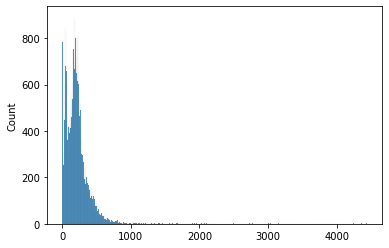

In [45]:
sns.histplot([len(x) for x in train_data],bins=1000)

# Since most of the text data is less than 1000 words, we will select sequences to be approximate 600

In [46]:
MAX_SEQUENCE_LENGTH = 600
EMBEDDING_DIM = 30

In [47]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=MAX_SEQUENCE_LENGTH)
# Padding to make equal length of 600 sequences

In [48]:
train_data.shape

(44898, 600)

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_data,news_data['IS_FAKE'],test_size=0.2)

In [50]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((35918, 600), (8980, 600), (35918,), (8980,))

In [51]:
model = keras.Sequential()
model.add(keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))

# Below layers are not required.

# model.add(keras.layers.Conv1D(100, 4, activation='relu')) 
# model.add(keras.layers.MaxPooling1D(4))

model.add(keras.layers.LSTM(units=128))

model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

2021-11-28 10:14:29.858846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 10:14:29.860126: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 10:14:29.860803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 10:14:29.861660: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 30)           300000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               81408     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 381,537
Trainable params: 381,537
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(X_train, Y_train, epochs=5,batch_size=1000, validation_split=0.1,verbose=1)

2021-11-28 10:14:38.362152: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2021-11-28 10:14:40.749632: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


33/33 [==============================] - 9s 153ms/step - loss: 0.5927 - accuracy: 0.7233 - val_loss: 0.4589 - val_accuracy: 0.8572
Epoch 2/5
33/33 [==============================] - 5s 141ms/step - loss: 0.2475 - accuracy: 0.9250 - val_loss: 0.1491 - val_accuracy: 0.9468
Epoch 3/5
33/33 [==============================] - 5s 141ms/step - loss: 0.1003 - accuracy: 0.9670 - val_loss: 0.0835 - val_accuracy: 0.9730
Epoch 4/5
33/33 [==============================] - 5s 140ms/step - loss: 0.0527 - accuracy: 0.9845 - val_loss: 0.0631 - val_accuracy: 0.9777
Epoch 5/5
33/33 [==============================] - 5s 139ms/step - loss: 0.0317 - accuracy: 0.9917 - val_loss: 0.0557 - val_accuracy: 0.9836


In [53]:
print(model.evaluate(X_test,Y_test, verbose=1))

281/281 [==============================] - 3s 11ms/step - loss: 0.0520 - accuracy: 0.9850
[0.052019648253917694, 0.9849665760993958]


In [54]:
import numpy as np

y_predicted = model.predict(X_test)
y_predicted_labels = [np.round(i) for i in y_predicted]

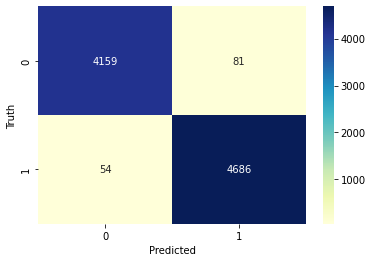

In [55]:
sns.heatmap(tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels), annot=True, fmt='d',cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Bi-directional LSTM

In [56]:
model = keras.Sequential()
model.add(keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))

model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128))) # Only added Bi-directional layer

model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 30)           300000    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               162816    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 463,073
Trainable params: 463,073
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train, Y_train, epochs=5,batch_size=1000, validation_split=0.1,verbose=1)

Epoch 1/5
33/33 [==============================] - 12s 293ms/step - loss: 0.5762 - accuracy: 0.7090 - val_loss: 0.3452 - val_accuracy: 0.8692
Epoch 2/5
33/33 [==============================] - 9s 273ms/step - loss: 0.2456 - accuracy: 0.9197 - val_loss: 0.3383 - val_accuracy: 0.8831
Epoch 3/5
33/33 [==============================] - 9s 272ms/step - loss: 0.3953 - accuracy: 0.8791 - val_loss: 0.2903 - val_accuracy: 0.9337
Epoch 4/5
33/33 [==============================] - 9s 273ms/step - loss: 0.1412 - accuracy: 0.9572 - val_loss: 0.1008 - val_accuracy: 0.9624
Epoch 5/5
33/33 [==============================] - 9s 274ms/step - loss: 0.0684 - accuracy: 0.9767 - val_loss: 0.0758 - val_accuracy: 0.9727


In [58]:
print(model.evaluate(X_test,Y_test, verbose=1))

281/281 [==============================] - 6s 21ms/step - loss: 0.0717 - accuracy: 0.9744
[0.07171092927455902, 0.974387526512146]


In [59]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.round(i) for i in y_predicted]

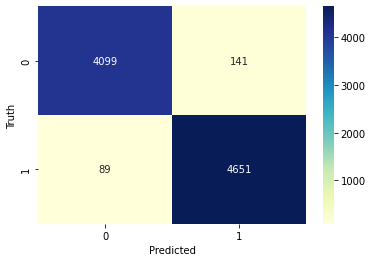

In [60]:
sns.heatmap(tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels), annot=True, fmt='d',cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Conclusion

1.  For this dataset we can use LSTM or LogisticRegression
2.  We can try to add more layers to improve accuracy in LSTM
3.  We can try to select optimal numbers of frequent words while tokenizing